# Descriptive Statistics

Summary statistics are statistical measures that condense and present key characteristics of data using a single value. Calculating descriptive statistics is a typical initial procedure after data cleaning and preparation for analysis. Earlier Lab have demonstrated various examples of summary statistics, like means and medians. In this Lab, we will revisit these functions and introduce several new ones to further enhance our understanding.

# Measures of Center

Measures of center are statistical metrics that provide insights into the central tendency of a numeric variable. These measures help us understand what a typical value looks like within the dataset. The most common measures of center are the mean, median, and mode.

The mean represents the average value, calculated by summing all the values and dividing the total by the number of records. In R, there are multiple ways to compute means, as we have previously observed.

In [1]:
cars <- mtcars      # Use the mtcars data set

mean(cars$mpg)      # mean() gets the mean for 1 variable

[1] 20.09062

In [2]:
# The function colMeans() calculates the mean values for all the columns in the data frame 'cars'.
colMeans(cars)

mpg        cyl       disp         hp       drat         wt       qsec 
 20.090625   6.187500 230.721875 146.687500   3.596563   3.217250  17.848750 
        vs         am       gear       carb 
  0.437500   0.406250   3.687500   2.812500

The `rowMeans()` function calculates the means for each row in a data frame. Let's preview the results using the `head()` function applied to the `rowMeans(cars)` output.

In [3]:
head(rowMeans(cars))    

Mazda RX4     Mazda RX4 Wag        Datsun 710    Hornet 4 Drive 
         29.90727          29.98136          23.59818          38.73955 
Hornet Sportabout           Valiant 
         53.66455          35.04909

The median of a distribution represents the point at which half of the data lies below it, and the other half lies above it. It essentially divides the data into two equal parts. The median is also referred to as the 50th percentile, signifying that 50% of the observations fall below this value. As demonstrated earlier, you can easily obtain the median using the median() function.

In [4]:
median(cars$mpg)

[1] 19.2

To obtain the median for each column, the apply() function can be utilized. This function requires a data object, the specific function to execute, and the designated margin (rows or columns).

In [5]:
colMedians <- apply(cars,            
                    MARGIN=2,        # Operate on columns
                    FUN = median)    # Use function median

colMedians

mpg     cyl    disp      hp    drat      wt    qsec      vs      am    gear 
 19.200   6.000 196.300 123.000   3.695   3.325  17.710   0.000   0.000   4.000 
   carb 
  2.000

While both the mean and median provide insights into the center of a distribution, they may not always be equal. The median represents the value that divides the data into two equal halves, while the mean is a numerical average, making it susceptible to the influence of extreme values. When dealing with a symmetric distribution, the mean and median will be identical. To explore this further, let's visualize the data using a density plot.

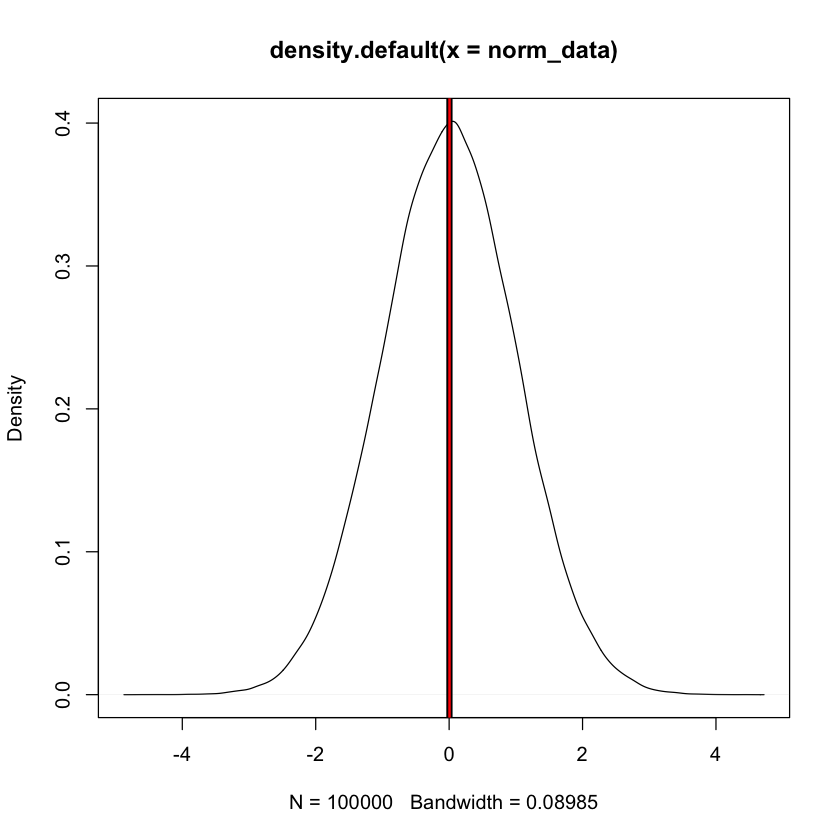

In [6]:
norm_data <- rnorm(100000)          # Generate normally distributed data

plot(density(norm_data))            # Create a density plot

abline(v=mean(norm_data), lwd=5)    # Plot a thick black line at the mean

abline(v=median(norm_data), col="red", lwd=2 )   # Plot a red line at the median

In the given plot, both the mean and median values are extremely close to zero, resulting in the red median line overlapping with the thicker black line representing the mean.

Skewed distributions have a noticeable impact on the mean, often pulling it towards the direction of the skew. On the other hand, the median tends to remain resilient to the effects of skewness.

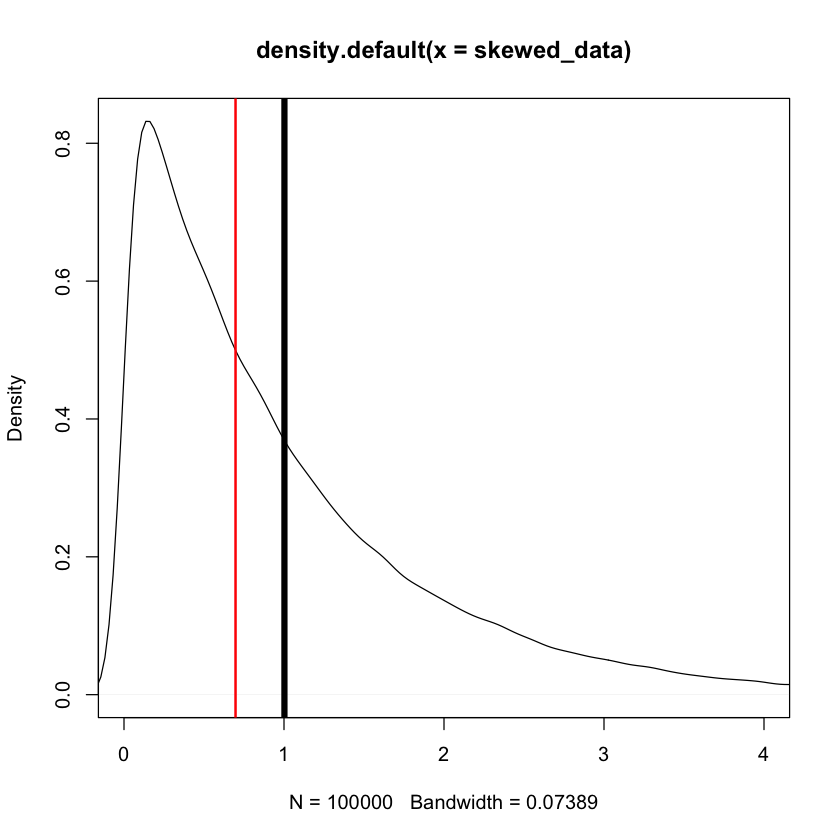

In [7]:
skewed_data <- rexp(100000,1)           # Generate skewed data

plot(density(skewed_data), xlim=c(0,4))    

# Black line at the mean
abline(v=mean(skewed_data), lwd=5)  

# Red line at the median
abline(v=median(skewed_data), col="red", lwd=2 )  

Outliers have a significant impact on the mean, but the median is more resilient to their influence.

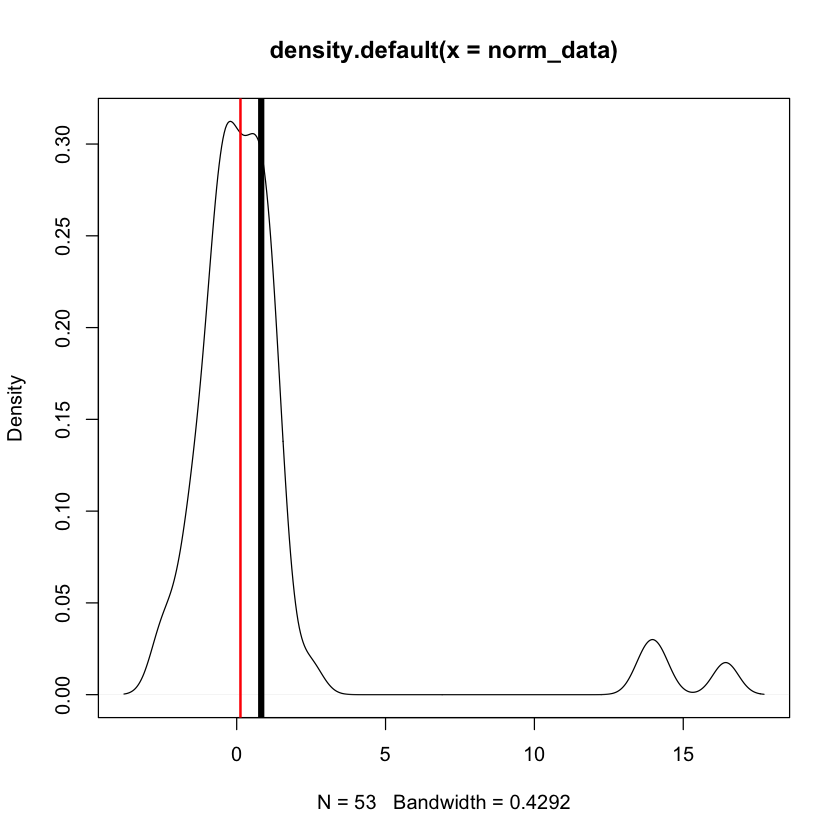

In [8]:
norm_data <- rnorm(50)             # Generate 50 normally distributed points

outliers <- rnorm(3, mean=15)      # Generate 3 outliers

norm_data <- c(norm_data,outliers)      # Add outliers

plot(density(norm_data))                

# Black line at the mean
abline(v=mean(norm_data), lwd=5)        

# Red line at the median
abline(v=median(norm_data), col="red", lwd=2 )   

The median is considered a "robust" statistic because it is less affected by skewness and outliers compared to the mean. When dealing with distributions that have significant skew or outliers, the median provides a more accurate representation of the typical value.

The mode represents the value that appears most frequently in a dataset. Unlike the mean and median, the mode can be applied to categorical variables, and there can be multiple modes in a dataset. In R, there is no built-in function to find the mode since it may not always be a meaningful statistic. In cases where all values in a variable are unique, the mode becomes essentially irrelevant.

To determine the mode of a variable, you can create a data table for the variable to obtain the frequency counts of each value and then identify the value with the highest count. This approach allows you to find the mode effectively in such cases.

In [9]:
# Dummy data
data <- c("cat","hat","cat","hat","hat","sat")   

# Create table of counts
data_table <- table(data)                   

data_table

# Get the index of the variable with the max count
max_index <- which.max(data_table)   

# Use the index to get the mode from the table's names
names(data_table)[max_index]     

data
cat hat sat 
  2   3   1 

[1] "hat"

In case you find yourself requiring the mode calculation repeatedly, you have the option to encapsulate these steps within a custom-defined function.

In [10]:
mode_function <- function(data){                         # Define new function
    data_table <- table(data)                            # Create data table
    max_index <- which.max(data_table)                   # Find max index
    if (is.numeric(data)){                               # If input is numeric data
        return(as.numeric(names(data_table)[max_index])) # Return output as numeric
    }
    names(data_table)[max_index]            # Otherwise return output as character
}

mode_function(data)

[1] "hat"

**Note:** While Base R includes a function named mode(), it doesn't calculate the mode of a data set; instead, it verifies the type or storage mode of an object.

Now, we can utilize our recently defined mode function to determine the modes of each column in the mtcars data set. To achieve this, we will pass the mode function into the apply function.

In [11]:
colModes <- apply(cars,            
                 MARGIN=2,               # operate on columns
                 FUN = mode_function)    # use function mode_function

print(colModes)

   mpg    cyl   disp     hp   drat     wt   qsec     vs     am   gear   carb 
 10.40   8.00 275.80 110.00   3.07   3.44  17.02   0.00   0.00   3.00   2.00 


# Measures of Spread

Measures of spread, also known as dispersion, are statistical metrics used to describe the variability of data. While measures of center provide insights into the typical value, measures of spread help us understand the extent to which the data deviates from the typical value.

One basic measure of spread is the range, which calculates the distance between the highest and lowest observations in the dataset.

In [12]:
# Subtract min from max to get the range
max(cars$mpg) - min(cars$mpg)     

[1] 23.5

As previously mentioned, the median corresponds to the 50th percentile of a dataset. To provide an overview of a variable's distribution, we can use multiple percentiles. The quantile() function allows us to extract various percentiles, such as the minimum value (0th percentile), first quartile (25th percentile), median, third quartile (75th percentile), and maximum value (100th percentile).

In [13]:
quantile(cars$mpg)

0%    25%    50%    75%   100% 
10.400 15.425 19.200 22.800 33.900

As these values are frequently employed to depict data, they are referred to as the "five number summary." Moreover, R offers a few alternative methods to calculate them.

In [15]:
# Obtain the five-number summary for the 'mpg' column in the 'cars' dataset using fivenum().
fivenum(cars$mpg)   

# The summary() function provides the five-number summary along with the mean for the 'mpg' column in the 'cars' dataset.
summary(cars$mpg)   



[1] 10.40 15.35 19.20 22.80 33.90

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.40   15.43   19.20   20.09   22.80   33.90 

With the quantile() function, you have the flexibility to examine percentiles beyond the standard ones used in the five-number summary. To calculate specific percentiles, simply provide a vector of desired percentiles using the probs argument.

In [16]:
quantile(cars$mpg,
        probs = c(0.1,0.9))  # get the 10th and 90th percentiles

10%   90% 
14.34 30.09

The interquartile range (IQR) serves as another frequently used measure of data spread. It represents the range between the 3rd quartile and the 1st quartile, encompassing 50% of the data. R provides a built-in function called IQR() to calculate the interquartile range.

In [17]:
IQR(cars$mpg)

[1] 7.375

The boxplots we have been taught to generate in the plotting lessons are graphical depictions of the five-number summary and the interquartile range (IQR).

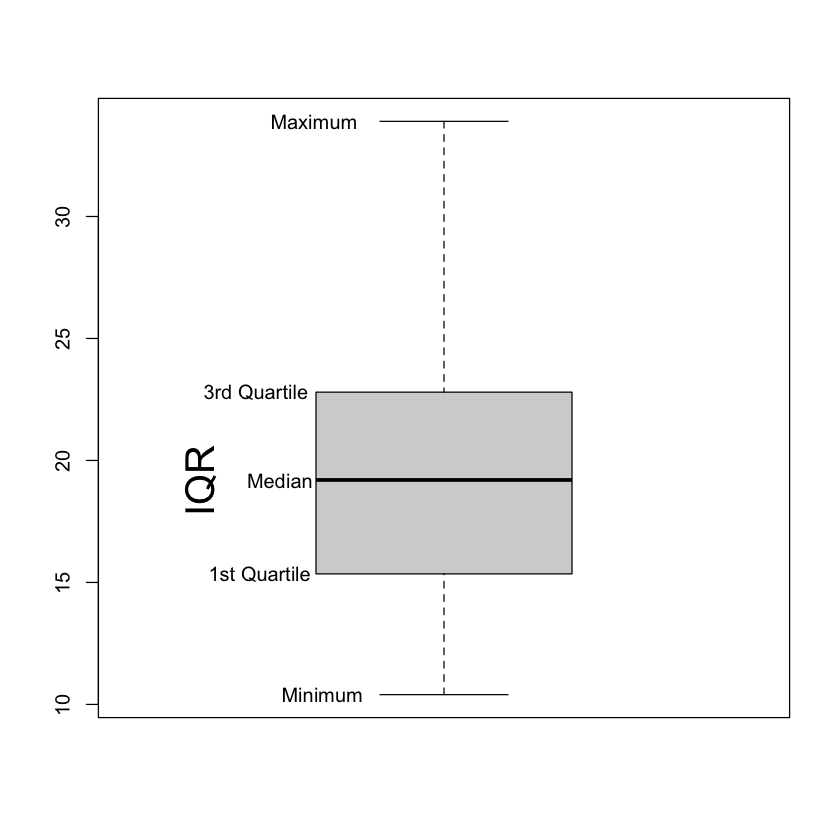

In [18]:
five_num <- fivenum(cars$mpg)

boxplot(cars$mpg)

text(x=five_num[1], adj=2, labels ="Minimum")
text(x=five_num[2], adj=2.3, labels ="1st Quartile")
text(x=five_num[3], adj=3, labels ="Median")
text(x=five_num[4], adj=2.3, labels ="3rd Quartile")
text(x=five_num[5], adj=2, labels ="Maximum")
text(x=five_num[3], adj=c(0.5,-8), labels ="IQR", srt=90, cex=2)

Variance and standard deviation are two frequently used measures to quantify the spread of a distribution. Variance represents the average of the squared differences between each data point and the mean. To calculate variance, you can utilize the built-in function var().

In [19]:
var(cars$mpg)   # get variance

[1] 36.3241

The standard deviation is calculated as the square root of the variance. It is often more interpretable than variance because it is expressed in the same units as the variable under consideration, while variance is expressed in squared units. To check the standard deviation, you can use the sd() function.

In [20]:
sd(cars$mpg)    # get standard deviation

[1] 6.026948

As both variance and standard deviation are calculated based on the mean, they can be affected by data skew and outliers. To address this issue, an alternative measure of spread is the median absolute deviation (MAD), which relies on the median and inherits its robustness against the impact of skew and outliers. To compute the median absolute deviation, you can utilize the built-in mad() function.

In [21]:
mad(cars$mpg)    # get median absolute deviation

[1] 5.41149

# Skewness and Kurtosis

In addition to measures of center and spread, descriptive statistics encompass metrics that provide insights into the distribution's shape. Skewness quantifies the degree of asymmetry in a distribution, whereas kurtosis measures the concentration of data in the tails compared to the central region. While we won't delve into the exact computations behind skewness and kurtosis, they are essentially statistical measures that extend the concept of variance. While variance involves squaring deviations from the mean, skewness involves cubing deviations, and kurtosis involves raising deviations to the 4th power.

To assess skewness and kurtosis, we will utilize the "e1071" package. First, we will generate some dummy data and analyze it using a series of plots.

In [22]:
install.packages('e1071')

also installing the dependencies ‘class’, ‘proxy’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



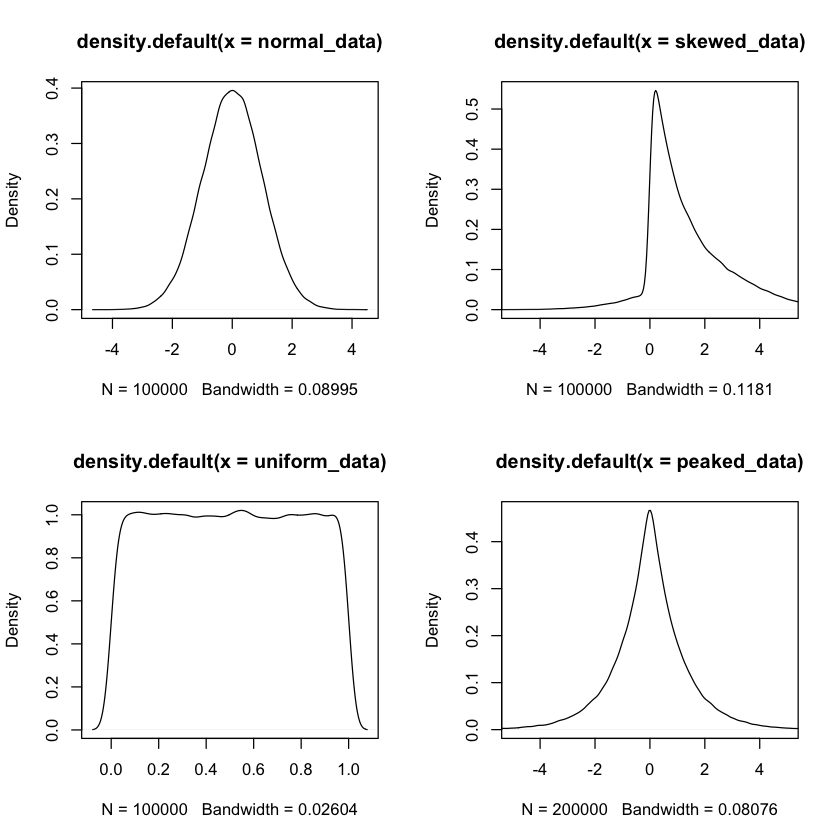

In [24]:
library(e1071)

normal_data <- rnorm(100000)                       # Generate normally distributed data
skewed_data <- c(rnorm(35000,sd=2)+2,rexp(65000))  # Generate skewed data
uniform_data <- runif(100000,0,1)                  # Generate uniformly distributed data
peaked_data <- c(rexp(100000),                     # Generate data with a sharp peak
                (rexp(100000)*-1))


par(mfrow=c(2,2))                          # Make density plots of the distributions*
plot(density(normal_data))
plot(density(skewed_data),xlim=c(-5,5))
plot(density(uniform_data))
plot(density(peaked_data),xlim=c(-5,5))

*Note: The function par() allows you to adjust graphical parameters. In this instance, setting mfrow=c(2,2) enables the combination of four plots into one, arranged in a 2x2 grid.*

Next, let's examine the skewness of each distribution. Skewness measures the degree of asymmetry, and we anticipate observing low skewness in all distributions, except for the second one, as the others are approximately symmetric:

In [25]:
skewness(normal_data)
skewness(skewed_data)
skewness(uniform_data)
skewness(peaked_data)

[1] -0.009499008

[1] 0.9968196

[1] 0.002395221

[1] 0.004372427

The three distributions exhibit nearly zero skewness, indicating their rough symmetry, while the positively skewed distribution shows positive skewness. Now, let's examine kurtosis, which measures the degree of peakedness. We would anticipate that the flat (uniform) distribution has low kurtosis, while the distributions with sharper peaks would have higher kurtosis.

In [26]:
kurtosis(normal_data)
kurtosis(skewed_data)
kurtosis(uniform_data)
kurtosis(peaked_data)

[1] 0.01066888

[1] 1.834317

[1] -1.202733

[1] 3.0111

The output reveals that the normally distributed data exhibits kurtosis close to zero, while the flat distribution displays negative kurtosis. On the other hand, the two distributions with more data in the tails compared to the center demonstrate higher kurtosis values.

# Conclusion

Descriptive statistics play a crucial role in exploring various aspects of your data, such as its central tendency, variability, and distribution shape, by presenting them in numerical form. These statistical measures aid in understanding the direction of analysis and facilitate clear and concise communication of insights to others. Moreover, specific values like the mean and variance hold significance in a wide range of statistical tests and predictive models.

Throughout this Lab, we utilized random data extensively to illustrate concepts. However, we have yet to delve into the details of the functions responsible for generating this random data. 

# Exercises

To complete the exercises, you need to fill in the code boxes as per the instructions provided and then execute the code.

### Exercise #1
- Load the training data set for the Titanic.
- Calculate the disparity between the mean and median values of the Fare column.

In [27]:
titanic_train <- read.csv("../data/titanic/train.csv")

"Your Code Here!"

[1] "Your Code Here!"

### Exercise #2
Your task is to compute the standard deviation of the Fare column.

In [29]:
"Your Code Here!"

[1] "Your Code Here!"

### Exercise #3
Determine the mode of the Fare column.

In [30]:
fare_table <- table(titanic_train$Fare)

"Your Code Here!"

[1] "Your Code Here!"

## Exercise Solutions

In [31]:
# 1 

titanic_train <- read.csv("../data/titanic/train.csv")

mean(titanic_train$Fare) - median(titanic_train$Fare)


# 2 

fivenum(titanic_train$Fare)

# 3

fare_table <- table(titanic_train$Fare)

fare_table[which.max(fare_table)]



[1] 17.75001

[1]   0.0000   7.9104  14.4542  31.0000 512.3292

8.05 
  43